<a href="https://colab.research.google.com/github/Dasrunaik/Custom-Sentiment-Analysis-using-BERT/blob/main/Custom_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=messages=pd.read_csv('/content/SMSSpamCollection.txt',sep='\t',names=['label','message'])

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print(df.columns)


Index(['label', 'message'], dtype='object')


In [5]:
df.shape

(5572, 2)

In [6]:
df.value_counts('label')

,count
label,
ham,4825
spam,747


In [7]:
df.value_counts('message')

,count
message,
"Sorry, I'll call later",30
I cant pick the phone right now. Pls send a message,12
Ok...,10
Ok.,4
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!,4
...,...
"I can probably come by, everybody's done around &lt;#&gt; right?",1
I can make lasagna for you... vodka...,1
"I can make it up there, squeezed &lt;#&gt; bucks out of my dad",1


In [8]:
df.isnull().sum()

,0
label,0
message,0


In [9]:
df.duplicated().sum()

np.int64(403)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,Rofl. Its true to its name
freq,4516,1


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-13-285804874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


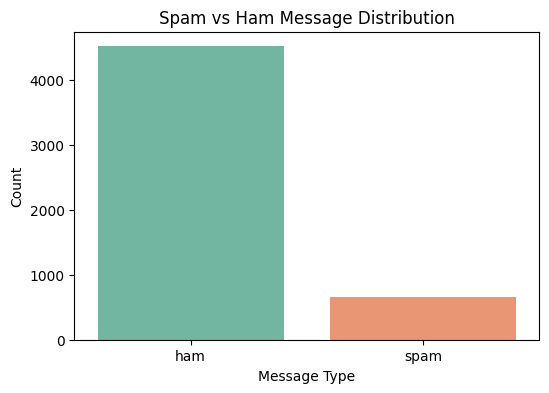

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Spam vs Ham Message Distribution')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

In [14]:
df['labels']=df['label'].apply(lambda x: 1 if x=='spam' else 0)

In [15]:
df

,label,message,labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [16]:
X=list(df['message'])

In [17]:
y=list(df['labels'])

Train test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
X_train

['Hey are you angry with me. Reply me dr.',
 'Okay, good, no problem, and thanx!',
 'So when you gonna get rimac access ',
 'Yes we were outside for like 2 hours. And I called my whole family to wake them up cause it started at 1 am',
 "LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323.",
 'Still work going on:)it is very small house.',
 'Is xy in ur car when u picking me up?',
 'You all ready for * big day tomorrow?',
 "Stop calling everyone saying I might have cancer. My throat hurts to talk. I can't be answering everyones calls. If I get one more call I'm not babysitting on Monday",
 "Yup i'm free...",
 "Mmmmmm ... I love you,so much, Ahmad ... I can't wait for this year to begin as every second takes me closer to being at your side. Happy New Year, my love!!",
 'It‘s £6 to get in, is that ok?',
 "Cause I'm not freaky lol",
 'say thanks2. ',
 'My friends use to call the same.',


In [20]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset


In [21]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [22]:
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
test_encodings = tokenizer((X_test), truncation=True, padding=True)

converting to Hugging Face Dataset

In [23]:
import torch
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_encodings['input_ids']),
                                               torch.tensor(train_encodings['attention_mask']),
                                               torch.tensor(y_train))

In [24]:
class SentientDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [25]:
train_dataset = SentientDataset(train_encodings, list(y_train))
test_dataset = SentientDataset(test_encodings, list(y_test))

Load Pretrained BERT for Classification

In [26]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fine-Tune The Model

In [27]:
 import os
os.environ["WANDB_DISABLED"] = "true"


In [28]:
training_args=TrainingArguments(output_dir='./results',
                                num_train_epochs=2,
                                learning_rate=2e-5,
                                per_device_train_batch_size=8,
                                per_device_eval_batch_size=8,
                                weight_decay=0.01,
                                logging_dir='./logs',
                                logging_steps=10,)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [29]:
trainer=Trainer(model=model,args=training_args,train_dataset=train_dataset,eval_dataset=test_dataset)

In [30]:
trainer.train()

Step,Training Loss
10,0.564900
20,0.362700
30,0.247600
40,0.116500
50,0.033300
60,0.007400
70,0.009200
80,0.002500
90,0.146300
100,0.092700


TrainOutput(global_step=1034, training_loss=0.05265111385572637, metrics={'train_runtime': 394.574, 'train_samples_per_second': 20.959, 'train_steps_per_second': 2.621, 'total_flos': 939219106542600.0, 'train_loss': 0.05265111385572637, 'epoch': 2.0})

Evaluate & Predict

In [31]:
# Evaluate
trainer.evaluate()

{'eval_loss': 0.017736412584781647,
 'eval_runtime': 15.6204,
 'eval_samples_per_second': 66.196,
 'eval_steps_per_second': 8.322,
 'epoch': 2.0}

Deploying Streamlit


In [32]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


In [33]:
import streamlit as st

Title Text

In [34]:
st.title("Custom_Sentiment_Analysis -Using The Hugging Face BERT")
st.subheader("Enetre the Sentence To Classify as Positive or Negative")

2025-07-07 17:34:54.536 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:55.735 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-07 17:34:55.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:55.741 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:55.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:55.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:55.746 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

Input Text

In [35]:
text=st.text_input("Enter the Sentence")

2025-07-07 17:34:55.775 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:55.781 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:55.783 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:55.784 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:55.789 Session state does not function when running a script without `streamlit run`
2025-07-07 17:34:55.791 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:55.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:55.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Predict Button

In [36]:
MODEL_NAME='bert-base-uncased'
tokenizer=BertTokenizer.from_pretrained(MODEL_NAME)
model=BertForSequenceClassification.from_pretrained(MODEL_NAME,num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
if st.button("Classify"):
  if not text.strip():
    st.warning("Please some enter a sentence.")
  else:
    # Tokenize input
    inputs=tokenizer(text,return_tensors="pt",truncation=True,Padding=True,max_length=128)

    # Make prediction
    with torch.no_grad():
      outputs=model(**inputs)
      logits=outputs.logits
      prediction=torch.argmax(logits,dim=1).item()

    #Display Result
    if prediction==1:
      st.success("The Sentence is Positive")
    else:
      st.error("The Sentence is Negative")

2025-07-07 17:34:57.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:57.269 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:57.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:57.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:57.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 17:34:57.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Save the model

In [38]:
model.save_pretrained("saved_bert_model")
tokenizer.save_pretrained("saved_bert_model")

('saved_bert_model/tokenizer_config.json',
 'saved_bert_model/special_tokens_map.json',
 'saved_bert_model/vocab.txt',
 'saved_bert_model/added_tokens.json')